In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import FunctionsToLoadGaia as load
import astropy.io.ascii, astropy.table

In [16]:

from glob import glob
filenames = glob('data/TgasSource_000-000-*.fits')
print filenames
X, Y, Z, AbsoluteMagnitudes = np.array([]), np.array([]), np.array([]), np.array([])
for f in filenames:
    XX,YY,ZZ,RA,Dec,Magnitudes,Distances,AB,Fluxes,label =load.extractStars(f)
    X = np.append(X, XX)
    Y = np.append(Y, YY)
    Z = np.append(Z, ZZ)
    AbsoluteMagnitudes = np.append(AbsoluteMagnitudes, AB)



['data/TgasSource_000-000-000.fits', 'data/TgasSource_000-000-001.fits', 'data/TgasSource_000-000-002.fits', 'data/TgasSource_000-000-003.fits', 'data/TgasSource_000-000-004.fits', 'data/TgasSource_000-000-005.fits', 'data/TgasSource_000-000-006.fits', 'data/TgasSource_000-000-007.fits', 'data/TgasSource_000-000-008.fits', 'data/TgasSource_000-000-009.fits', 'data/TgasSource_000-000-010.fits', 'data/TgasSource_000-000-011.fits', 'data/TgasSource_000-000-012.fits', 'data/TgasSource_000-000-013.fits', 'data/TgasSource_000-000-014.fits', 'data/TgasSource_000-000-015.fits']


In [17]:
# read the original table

original = astropy.io.ascii.read('data/starshp.dat', 
                            data_start=33,
                            names=['ID', 'X', 'Y', 'Z', 'DX', 'DY', 'DZ', 'BV', 'AbsMag'])


In [4]:
original

ID,X,Y,Z,DX,DY,DZ,BV,AbsMag
int64,float64,float64,float64,float64,float64,float64,float64,float64
0,0.0,0.0,0.0,0.0,0.0,0.0,0.65,4.85
1,-14.0824128361,111.6945222,-188.757422322,-8.9884064873,112.604261434,-188.599141107,0.482,2.3900569807
2,5.2618026678,10.3792208295,-46.5285206327,-31.3895667842,-7.926226517,-54.7571044629,0.999,5.8655302939
3,-153.253731518,377.606775432,-172.374848039,-158.752690605,371.5328946,-180.791411009,-0.019,-1.6194578069
4,46.5458846151,-37.9716587477,-120.036828652,10.6393506474,-55.8865650927,-128.293106111,0.37,2.4207813611
5,70.3671705226,-28.5762954143,-246.287676062,64.5003801122,-20.205877073,-248.935092183,0.902,1.4941586254
6,-4.8612667845,29.9506564346,-45.9158209056,-55.5815795019,0.4301933234,-59.8026269518,1.336,8.6067746339
7,-12.5947732344,41.6648961519,-38.1365075982,61.1169367029,39.3079294323,-73.0290308672,0.74,5.8277186881
8,-52.4058018307,154.711664307,-116.789562715,-51.3484019722,138.633667386,-108.574246066,1.102,2.5361467112


In [18]:
ID = np.arange(len(X))+1000000
DX = np.zeros_like(X)
DY = np.zeros_like(X)
DZ = np.zeros_like(X)
BV = np.zeros_like(X)

au_per_pc = 180/np.pi*60*60
X /= au_per_pc
Y /= au_per_pc
Z /= au_per_pc

gaia = astropy.table.Table([ID, X, Y, Z, DX, DY, DZ, BV, AbsoluteMagnitudes],
        names=['ID', 'X', 'Y', 'Z', 'DX', 'DY', 'DZ', 'BV', 'AbsMag'])
                      




In [6]:
gaia

ID,X,Y,Z,DX,DY,DZ,BV,AbsMag
int64,float64,float64,float64,float64,float64,float64,float64,float64
1000000,-103.691205916,5.90540934678,-118.280502087,0.0,0.0,0.0,0.0,2.00625527293
1000001,-169.15646867,9.11255329466,-192.453062061,0.0,0.0,0.0,0.0,3.53646489334
1000002,-208.974760259,11.7551949843,-237.977507806,0.0,0.0,0.0,0.0,3.23831476566
1000003,-287.553378917,16.2760155057,-327.635573262,0.0,0.0,0.0,0.0,2.87710297779
1000004,-417.556587541,23.7896232892,-473.926483361,0.0,0.0,0.0,0.0,1.16483881112
1000005,-76.2853655393,4.37435914773,-86.5219192078,0.0,0.0,0.0,0.0,4.66035099753
1000006,-116.037704631,6.68798802294,-131.486204158,0.0,0.0,0.0,0.0,3.65268601718
1000007,-316.02824329,18.4155671081,-358.52706391,0.0,0.0,0.0,0.0,2.16261732713
1000008,-106.323787556,6.33676232117,-121.032081067,0.0,0.0,0.0,0.0,3.93353028549


In [19]:
radius = 2.0/60.0/60.0
for i in range(len(gaia)):
    distance = sqrt((original['RA'] - gaia['RA'][i])**2 + (original['DEC'] - gaia['DEC'][i])**2 )

NameError: name 'sqrt' is not defined

In [7]:
combined = astropy.table.vstack([original,gaia])

In [8]:
combined

ID,X,Y,Z,DX,DY,DZ,BV,AbsMag
int64,float64,float64,float64,float64,float64,float64,float64,float64
0,0.0,0.0,0.0,0.0,0.0,0.0,0.65,4.85
1,-14.0824128361,111.6945222,-188.757422322,-8.9884064873,112.604261434,-188.599141107,0.482,2.3900569807
2,5.2618026678,10.3792208295,-46.5285206327,-31.3895667842,-7.926226517,-54.7571044629,0.999,5.8655302939
3,-153.253731518,377.606775432,-172.374848039,-158.752690605,371.5328946,-180.791411009,-0.019,-1.6194578069
4,46.5458846151,-37.9716587477,-120.036828652,10.6393506474,-55.8865650927,-128.293106111,0.37,2.4207813611
5,70.3671705226,-28.5762954143,-246.287676062,64.5003801122,-20.205877073,-248.935092183,0.902,1.4941586254
6,-4.8612667845,29.9506564346,-45.9158209056,-55.5815795019,0.4301933234,-59.8026269518,1.336,8.6067746339
7,-12.5947732344,41.6648961519,-38.1365075982,61.1169367029,39.3079294323,-73.0290308672,0.74,5.8277186881
8,-52.4058018307,154.711664307,-116.789562715,-51.3484019722,138.633667386,-108.574246066,1.102,2.5361467112


<IPython.core.display.Javascript object>


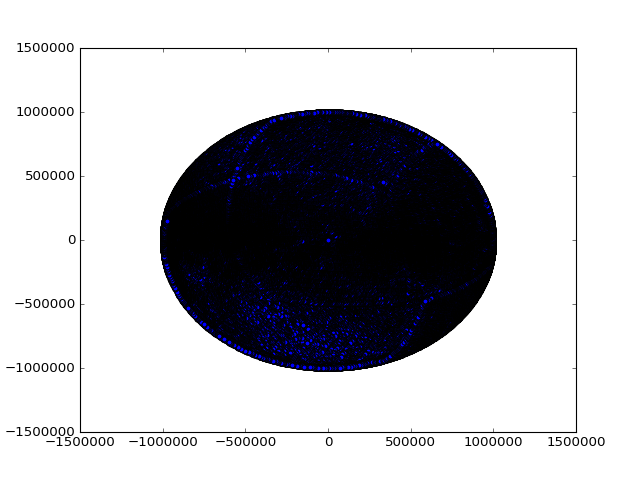

In [9]:
X = combined['X']
Z = combined['Z']
plt.scatter(X,Z)

In [10]:
import corner


def visualize(d):
    array = np.vstack([d.columns[i].data for i in np.arange(1,4)]).T
    names = d.colnames

    corner.corner(array, labels=names, 
                  plot_contours=False, 
                  plot_density=False, 
                  plot_datapoints=True, 
                  data_kwargs=dict(alpha=0.01, markersize=1))

<IPython.core.display.Javascript object>


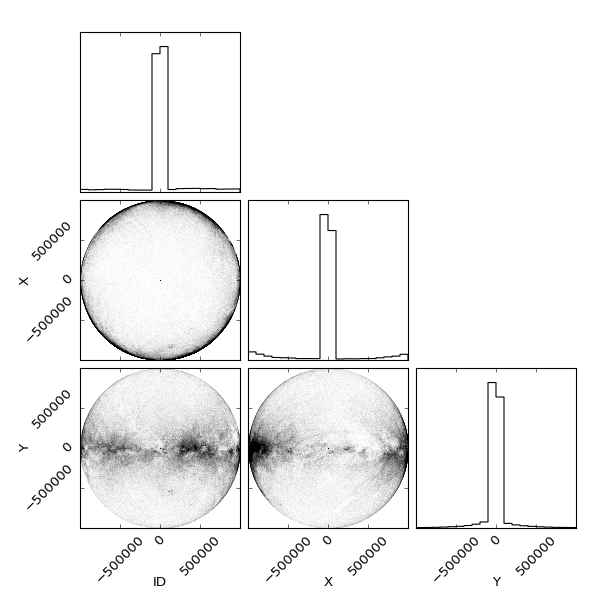

/Users/zkbt/anaconda2/envs/astroconda/lib/python2.7/site-packages/matplotlib/cbook.py:2644: UserWarning: Saw kwargs [u'ms', u'markersize'] which are all aliases for u'markersize'.  Kept value from u'markersize'
  seen=seen, canon=canonical, used=seen[-1]))


In [11]:
visualize(gaia)

In [12]:
# write out the table
astropy.io.ascii.write(combined, 'Combined.dat',
                       format='fixed_width',
                       delimiter='\t')#,overwrite=True)


In [13]:
# this trims the astropy header off the file
!tail +2 Combined.dat > CombinedWOheader.dat

In [14]:
# combine the prefix and the header together
!cat prefix.dat CombinedWOheader.dat > Combined.dat